# Testing of Img Utils (Data Engineering & Exploration)

Michael Janus, May/June 2018

Goal of this notebook is to test and validate the functions in **imgutils**, which functions as the infrastructure for the data engineering and exploration. For most functions, there are test-functions in **imgutils_test**, which also show how to use the functions together.

## 1. Import the used modules, including the one with test functions:

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib

import imgutils
import imgutils_test as tst

In [64]:
# Re-run this cell if you altered imgutils or imgutils_test
import importlib
importlib.reload(imgutils)
importlib.reload(tst)

<module 'imgutils_test' from 'C:\\JADS\\SW\\Grad Proj\\realxtals1\\sources\\imgutils_test.py'>

## 2. Test the basic image IO and display

In [7]:
tst.test_scanimgdir()

<bound method NDFrame.head of          filename
0  testimage1.tif
1  testimage2.tif>


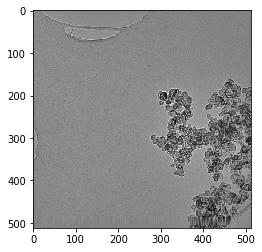

In [11]:
tst.test_loadandshowimg()

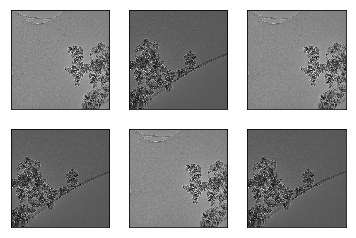

In [20]:
tst.test_loadandshowimgs()   # shows array of images

## 3. Test image slicing
The image slice functions cut-up an image into sub-images. 
The test function loads an image, slices it up and shows the array of images

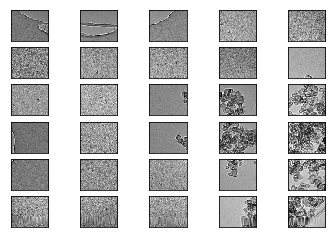

In [36]:
tst.test_sliceimage(6,5)

## 4. Test the heatmap display 
The heatmap slices up an image and overlays a heat color over the image slice. The test function uses fake heats

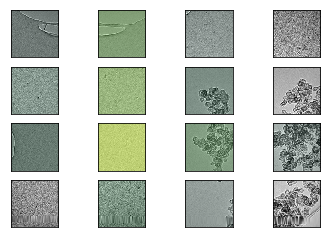

In [18]:
tst.test_heatmap()

## 5. Test the slice statistics functions
There are individual functions to return the statistics of an image. 
The **slicestats()** function combines image slicing and 

In [51]:
# first test dataframe stuff without statistics:
df1 = tst.test_slicestats_df()
df1.head()

         filename  s_y  s_x  n_y  n_x     alias
0  testimage1.tif    0    0    3    3  img0_0-0
1  testimage1.tif    0    1    3    3  img0_0-1
2  testimage1.tif    0    2    3    3  img0_0-2
3  testimage1.tif    1    0    3    3  img0_1-0
4  testimage1.tif    1    1    3    3  img0_1-1


,filename,s_y,s_x,n_y,n_x,alias
0,testimage1.tif,0,0,3,3,img0_0-0
1,testimage1.tif,0,1,3,3,img0_0-1
2,testimage1.tif,0,2,3,3,img0_0-2
3,testimage1.tif,1,0,3,3,img0_1-0
4,testimage1.tif,1,1,3,3,img0_1-1


n_y and n_x are the number of slices in the image in y and x direction; (s_x, s_y) is the slice index

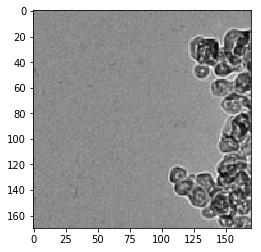

In [58]:
# get a single slice from this dataframe:
sliceimg = imgutils.getimgslice(df1, 4)
imgutils.showimg(sliceimg)

In [65]:
# test the  image statistics functions:
tst.test_statfuncs(sliceimg)

min:  49.0
max:  233.0
range:  184.0
median:  150.0
mean:  147.05726643598615
std_dev 18.091440389449318


#### Now test the function that combines slicing and statistics:

In [66]:
df2 = tst.test_slicestats()


         filename  s_y  s_x  n_y  n_x     alias  img_min  img_max    img_mean  \
0  testimage1.tif    0    0    4    4  img0_0-0    101.0    203.0  148.400574   
1  testimage1.tif    0    1    4    4  img0_0-1     96.0    196.0  147.171631   
2  testimage1.tif    0    2    4    4  img0_0-2    110.0    170.0  145.544128   
3  testimage1.tif    0    3    4    4  img0_0-3    131.0    154.0  143.726807   
4  testimage1.tif    1    0    4    4  img0_1-0    122.0    167.0  148.858826   
5  testimage1.tif    1    1    4    4  img0_1-1    125.0    164.0  148.931152   
6  testimage1.tif    1    2    4    4  img0_1-2     49.0    233.0  145.732849   
7  testimage1.tif    1    3    4    4  img0_1-3     56.0    194.0  141.968079   

     img_std  
0   6.343692  
1   6.953719  
2   3.665071  
3   2.920801  
4   3.525009  
5   3.505057  
6  20.939712  
7  21.179727  


## 6. Test the visualization of stats (interactive graph with image display)

This is based on a matplotlib graph with events hooked up to show the image that corresponds to the datapoint when clicked.

Notes:
- This function is not without issues, as it requires a switch to turn on interactivity.
- This sometimes requires restarting the kernel for it to work
- Behavior in e.g. PyCharm is slightly different, only updating when rescaling the graph window
- click the 'standby button' (top-right) to fix it into the notebook (if you don't click it, next graphs replace the one still open)

<IPython.core.display.Javascript object>


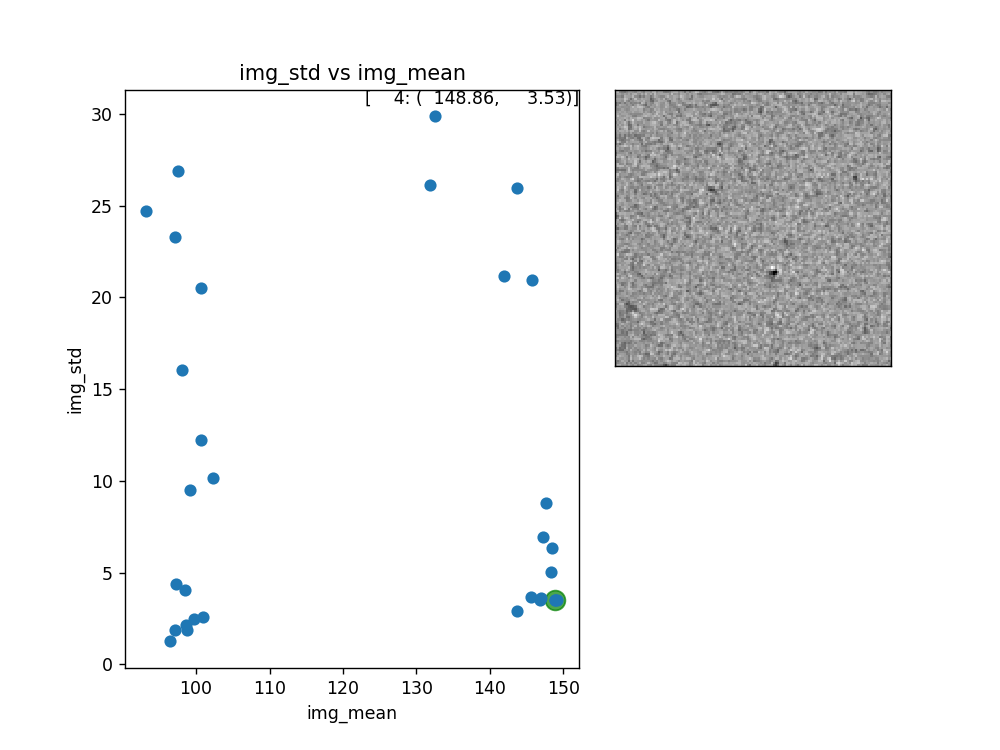

In [70]:
# need to tell matplotlib it's in a notebook, otherwise interactivity does not work
%matplotlib notebook   
imgutils.plotwithimg(df2, 'img_mean', 'img_std', imgutils.getimgslice)

#### Click on point in lower-right; data point 4 ... is that noise or on a crystal?


## Without context (i.e. image surrounding), still hard to judge image!
### So I create an alternative image display, which shows the slice in context

(I modified interactive graph plotwithimg so you can inject it with different image display)


<IPython.core.display.Javascript object>


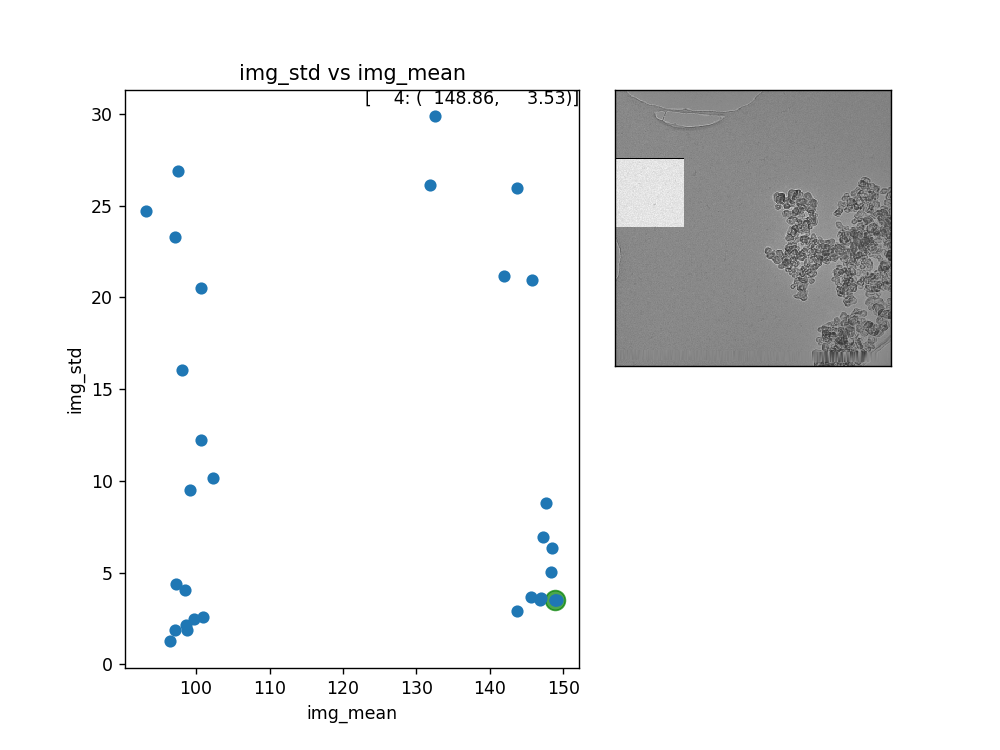

In [71]:
imgutils.plotwithimg(df2, 'img_mean', 'img_std', imgutils.highlightimgslice, True)

Now it's much clearer what the slice of the data point really is.

## 7. Normalization
The data should actually be normalized to reasonable values.
A common way is to use 'standardization' (see https://en.wikipedia.org/wiki/Normalization_(statistics) ).

In [73]:
imgutils.normalize(df2,['img_min'])
df2.head(3)

,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_mean,img_std,|img_min|
0,testimage1.tif,0,0,4,4,img0_0-0,101.0,203.0,148.400574,6.343692,0.723211
1,testimage1.tif,0,1,4,4,img0_0-1,96.0,196.0,147.171631,6.953719,0.578387
2,testimage1.tif,0,2,4,4,img0_0-2,110.0,170.0,145.544128,3.665071,0.983892


In [74]:
# check if indeed the mean of standardized column is 0 and has std_dev of 1:
print(df2['|img_min|'].mean())
print(df2['|img_min|'].std())

-9.8879238130678e-17
1.0


Ok (apart from some rounding)

Now apply it to the other columns

In [76]:
imgutils.normalize(df2, ['img_max', 'img_mean', 'img_std'])
df2.head(3)


,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_mean,img_std,|img_min|,|img_max|,|img_mean|,|img_std|
0,testimage1.tif,0,0,4,4,img0_0-0,101.0,203.0,148.400574,6.343692,0.723211,0.838037,1.119668,-0.451275
1,testimage1.tif,0,1,4,4,img0_0-1,96.0,196.0,147.171631,6.953719,0.578387,0.664704,1.068205,-0.386752
2,testimage1.tif,0,2,4,4,img0_0-2,110.0,170.0,145.544128,3.665071,0.983892,0.020893,1.000052,-0.734595


Plot the normalized version

<IPython.core.display.Javascript object>


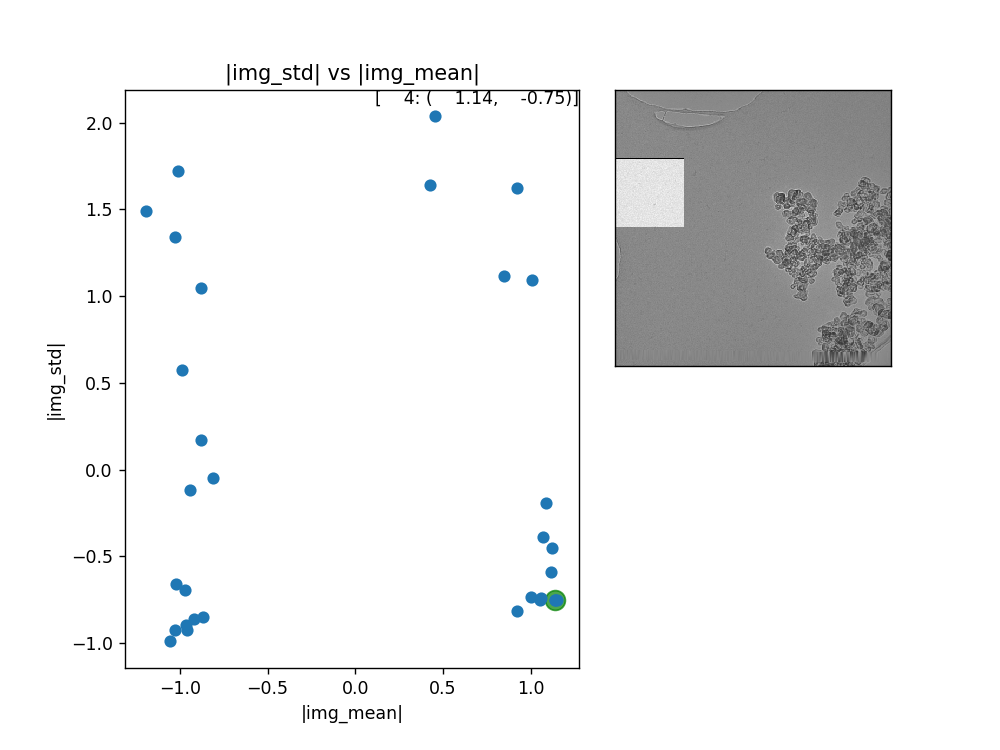

In [99]:
imgutils.plotwithimg(df2, '|img_mean|', '|img_std|', imgutils.highlightimgslice, True)

## 8. Play more with this test dataset...
Instead of the test-functions, let's use the imgutils functions directly

In [87]:
statfuncs = [imgutils.img_min, imgutils.img_max, imgutils.img_range, imgutils.img_mean, imgutils.img_std]
df_imgfiles = imgutils.scanimgdir('', '.tif')
imgfiles = list(df_imgfiles['filename'])
df3 = imgutils.slicestats(imgfiles, 4, 4, statfuncs)
df3.head()

,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_range,img_mean,img_std
0,testimage1.tif,0,0,4,4,img0_0-0,101.0,203.0,102.0,148.400574,6.343692
1,testimage1.tif,0,1,4,4,img0_0-1,96.0,196.0,100.0,147.171631,6.953719
2,testimage1.tif,0,2,4,4,img0_0-2,110.0,170.0,60.0,145.544128,3.665071
3,testimage1.tif,0,3,4,4,img0_0-3,131.0,154.0,23.0,143.726807,2.920801
4,testimage1.tif,1,0,4,4,img0_1-0,122.0,167.0,45.0,148.858826,3.525009


In [91]:
imgutils.normalize(df3, ['img_min', 'img_max', 'img_range', 'img_mean', 'img_std'])
df3.head(2)

,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_range,img_mean,img_std,|img_min|,|img_max|,|img_range|,|img_mean|,|img_std|
0,testimage1.tif,0,0,4,4,img0_0-0,101.0,203.0,102.0,148.400574,6.343692,0.723211,0.838037,0.144119,1.119668,-0.451275
1,testimage1.tif,0,1,4,4,img0_0-1,96.0,196.0,100.0,147.171631,6.953719,0.578387,0.664704,0.111641,1.068205,-0.386752


Let's do a 'pair-plot' to see if there something obvious

In [93]:
import seaborn as sb

<IPython.core.display.Javascript object>


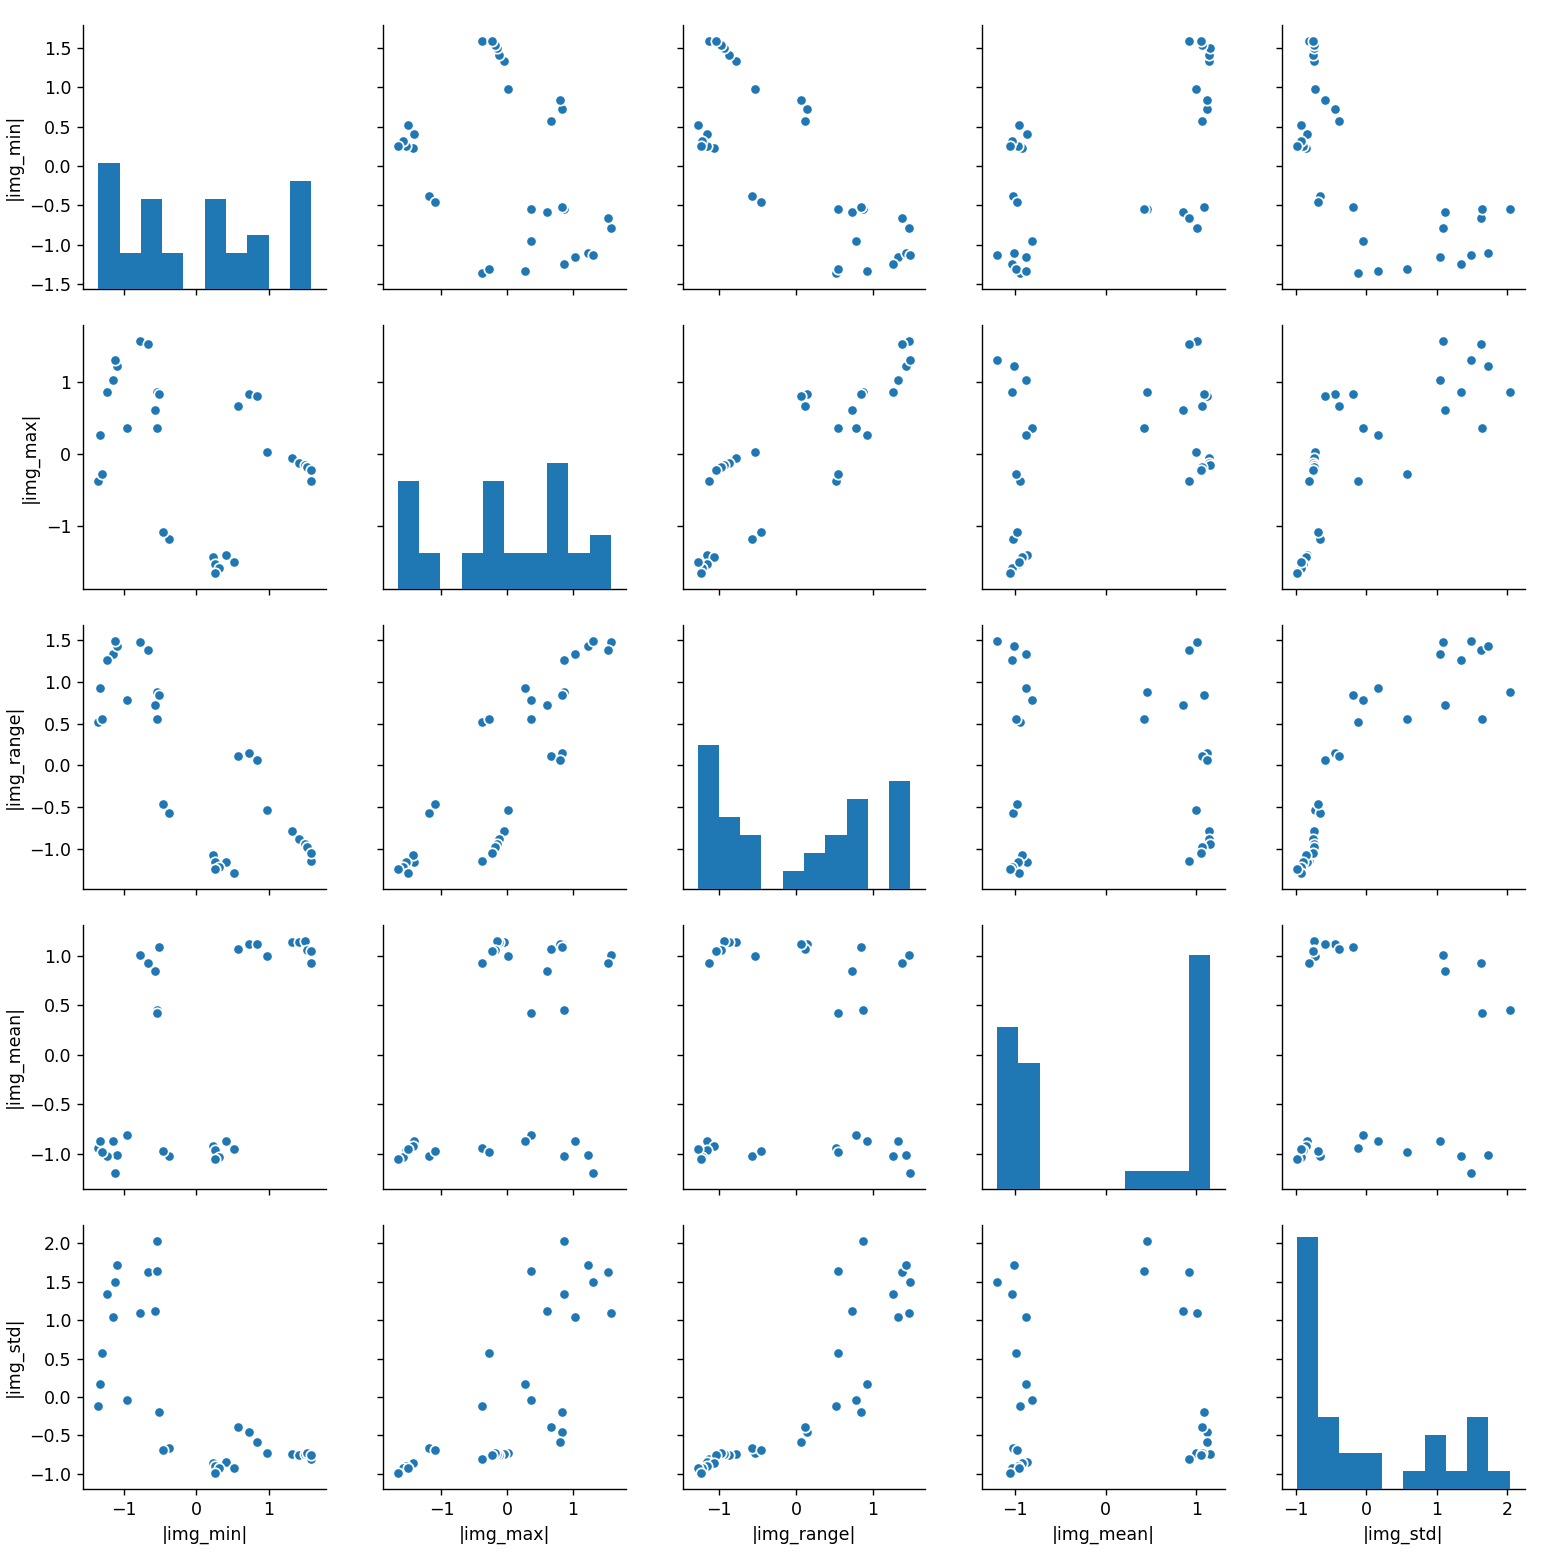

In [96]:
sb.pairplot(df3, vars=['|img_min|','|img_max|', '|img_range|','|img_mean|', '|img_std|'])

### Let's inspect some combinations that have 'signs of clustering' in the interactive graph

<IPython.core.display.Javascript object>


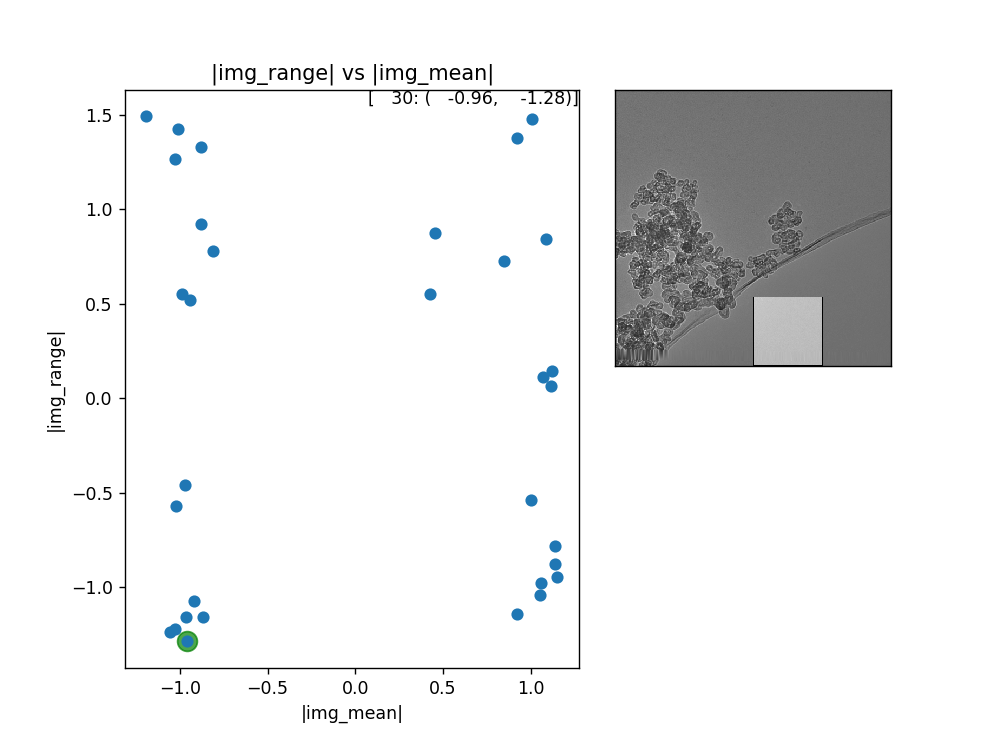

In [100]:
imgutils.plotwithimg(df3, '|img_mean|', '|img_range|', imgutils.highlightimgslice, True)

<IPython.core.display.Javascript object>


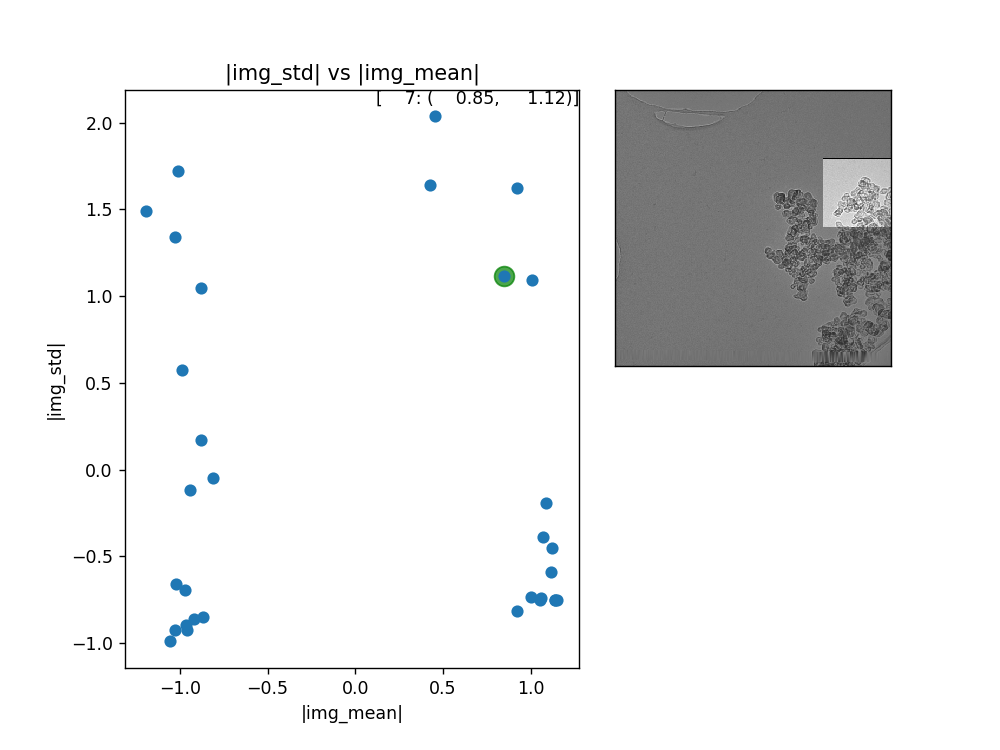

In [101]:
imgutils.plotwithimg(df3, '|img_mean|', '|img_std|', imgutils.highlightimgslice, True)

<IPython.core.display.Javascript object>


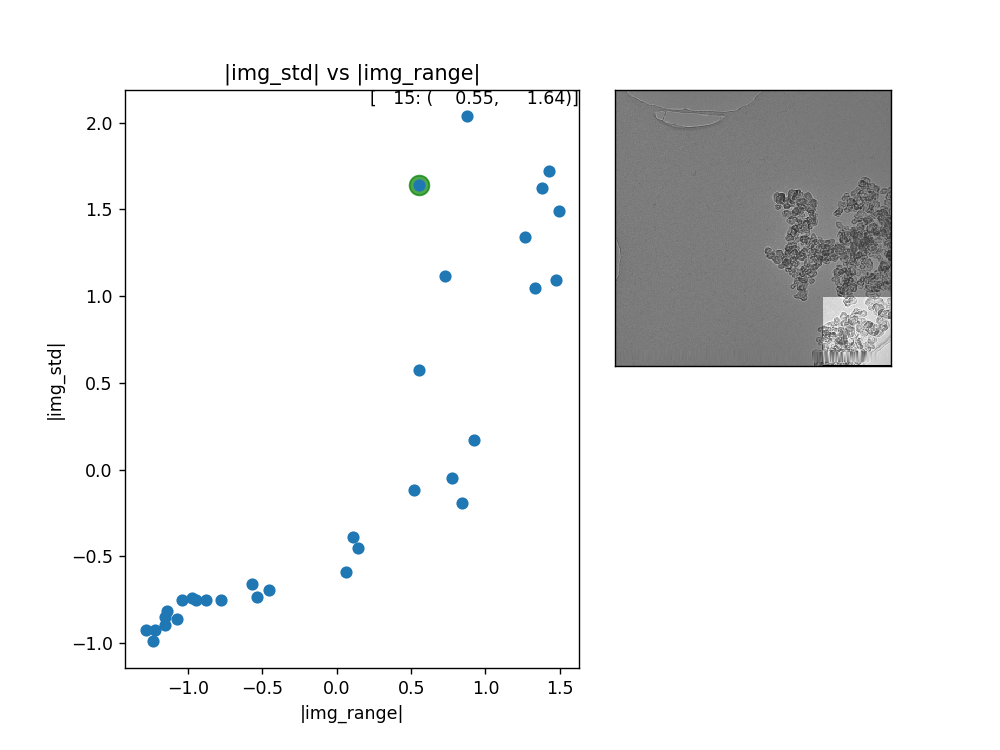

In [102]:
imgutils.plotwithimg(df3, '|img_range|', '|img_std|', imgutils.highlightimgslice, True)

## 9. Conclusions
- Build a number of infrastructural functions for the data engineering and exploration
- This notebook demonstrates how to use these functions
- It also shows with the test images that the concept of using simple statics on sub-images to reveal particles looks promosing!


## 10. Next steps: Try this out on larger set!



Michael Janus, 14 June 2018